<a href="https://colab.research.google.com/github/JimenezHAnaFer/SIMULACION-1/blob/main/Inventarios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



La demanda mensual de un cierto producto sigue la siguiente distribución de probabilidad empírica:


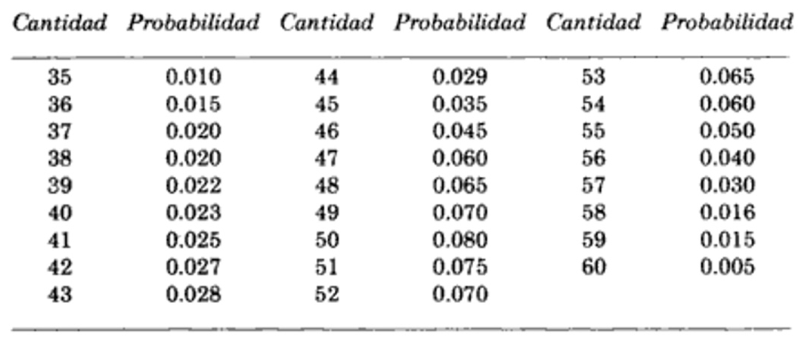

El tiempo de entrega está distribución de acuerdo a la siguiente función de probabilidad:



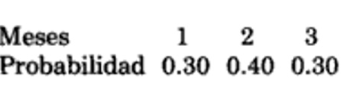

Simulación de Sistema de Inventario

Primera simulación con valores iniciales:


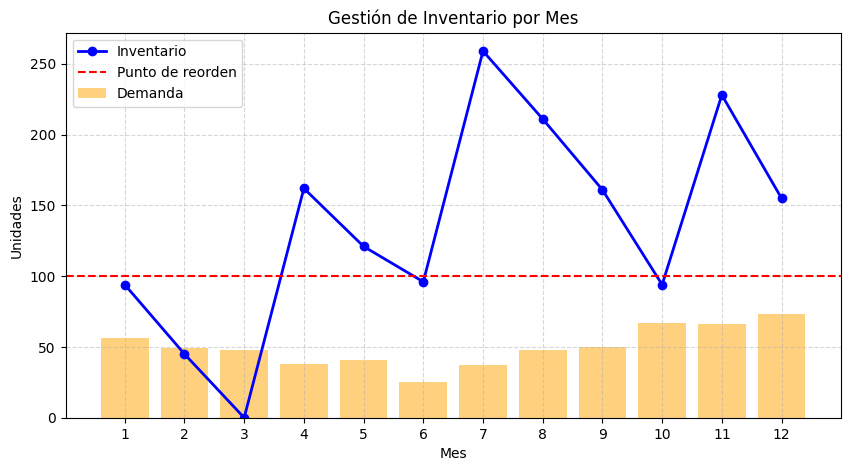

Costo total estimado: $3160.00

Buscando mejores parámetros


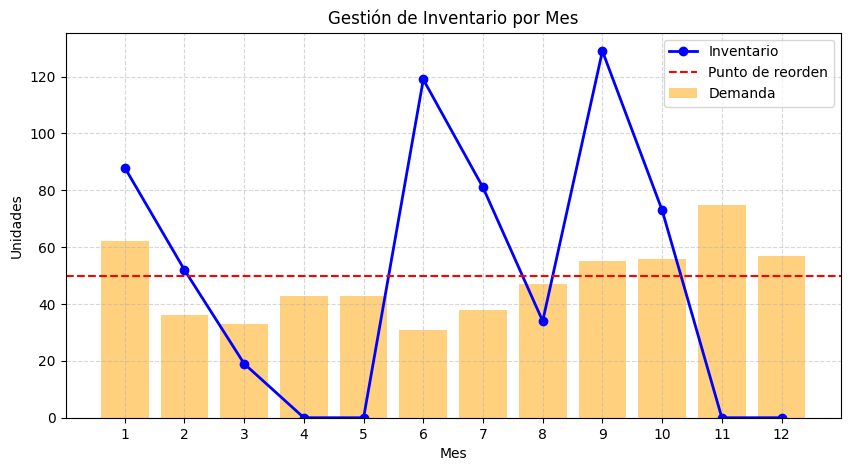

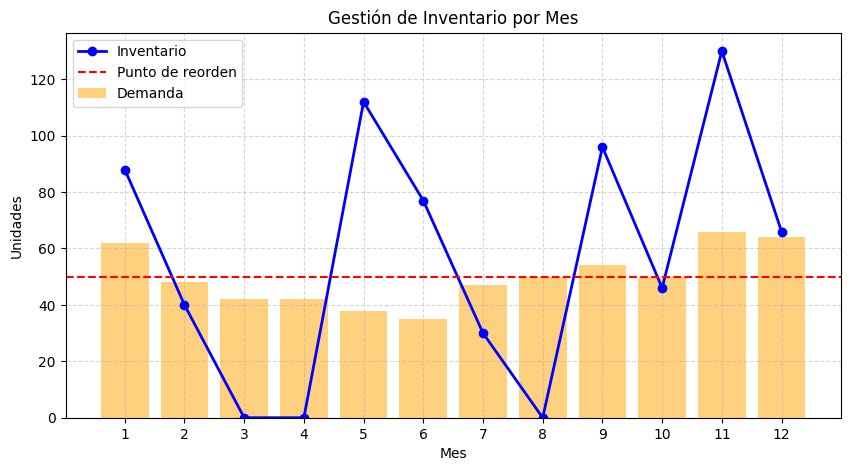

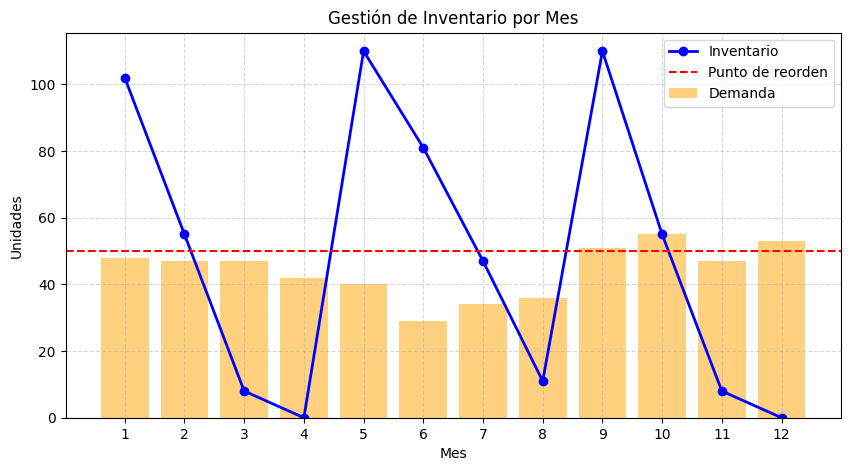

q=150, R=50: $5820.56


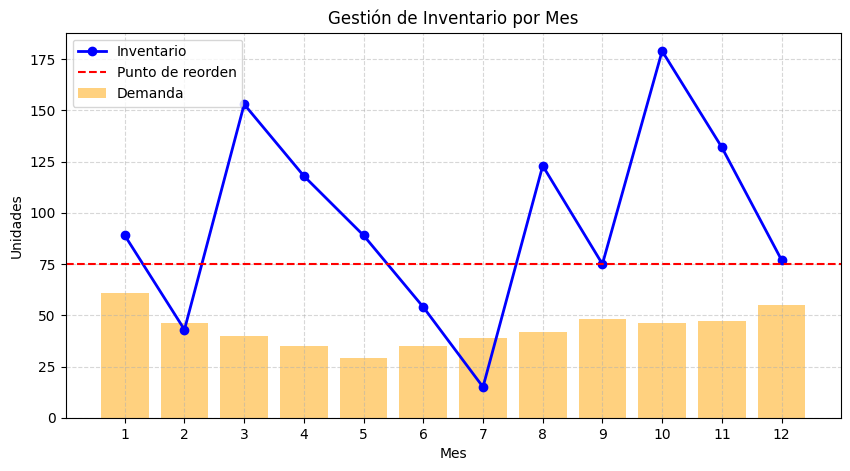

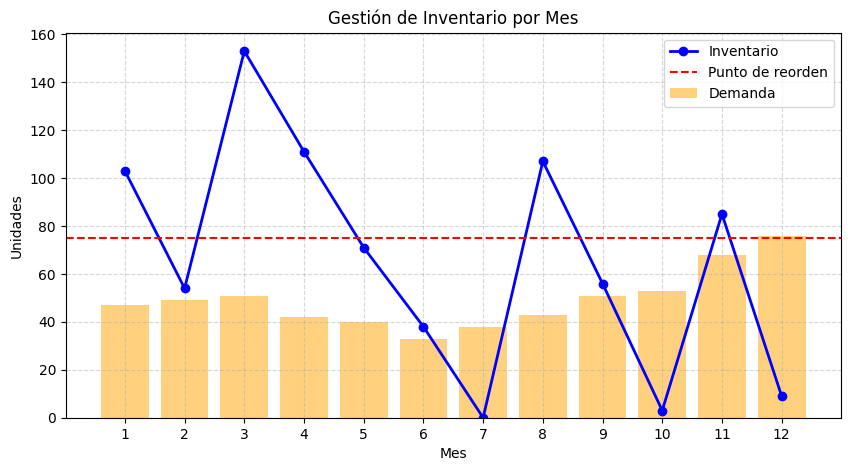

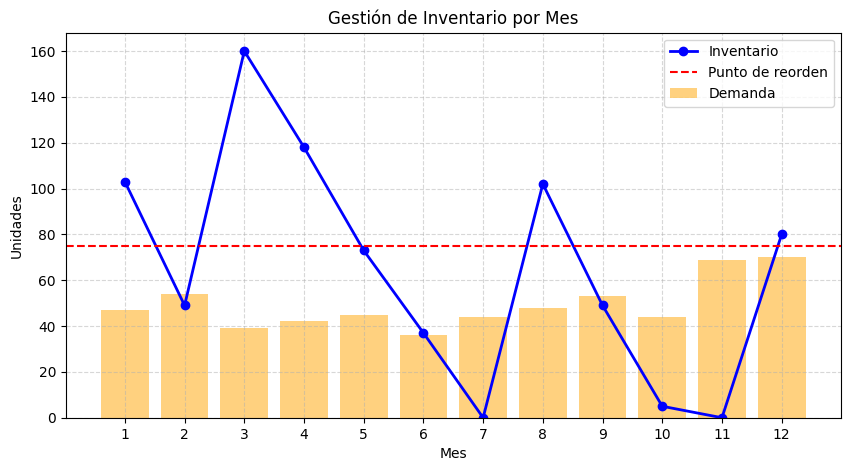

q=150, R=75: $3023.89


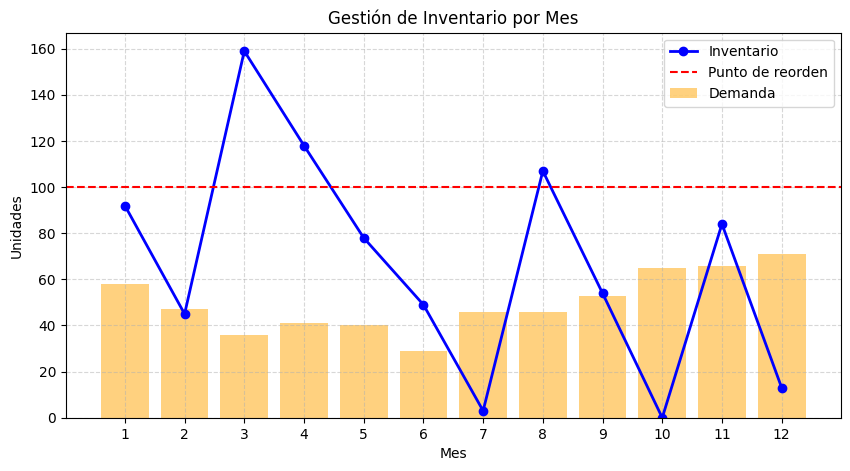

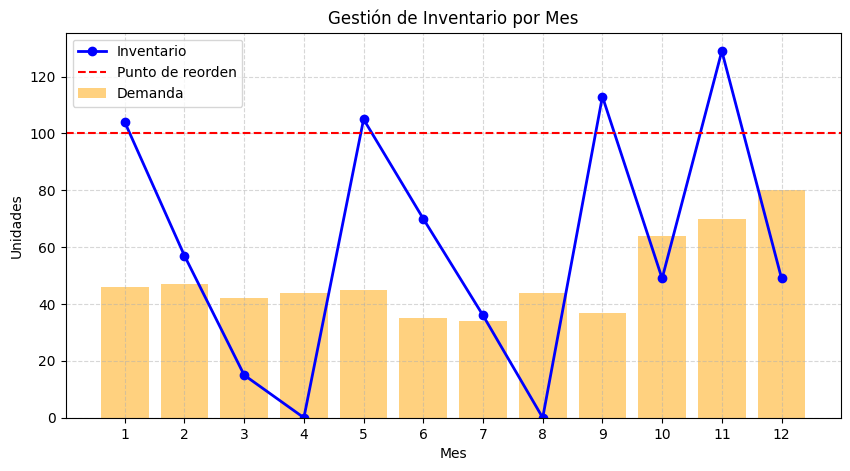

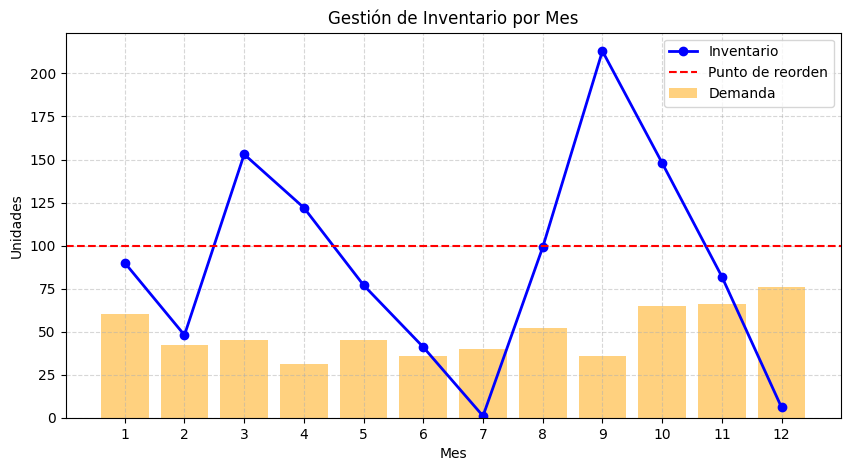

q=150, R=100: $2649.44


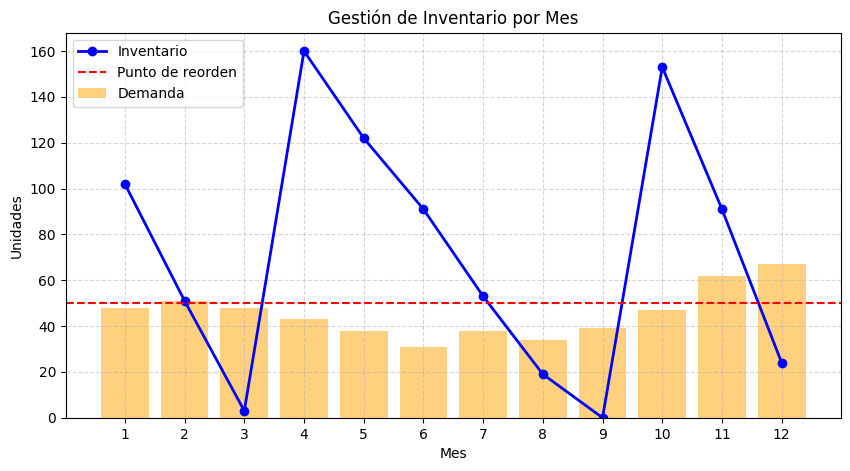

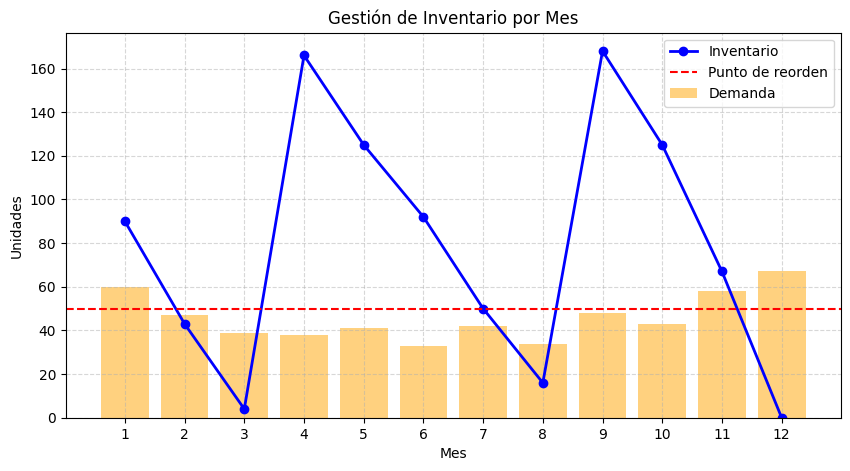

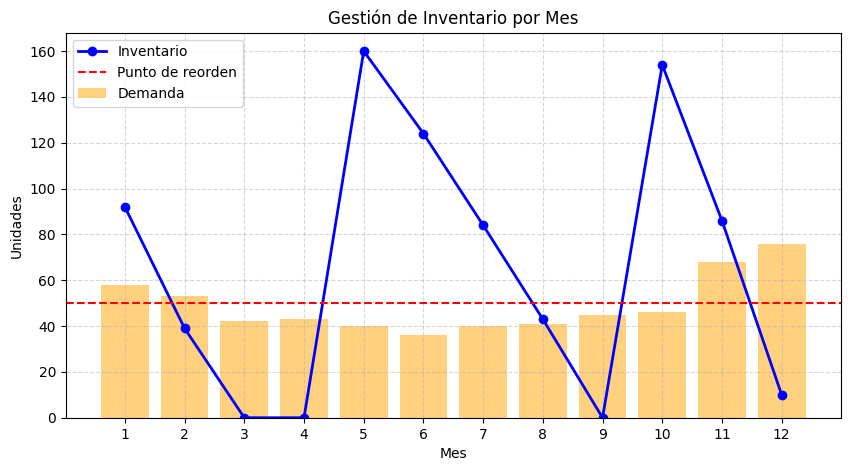

q=200, R=50: $2881.67


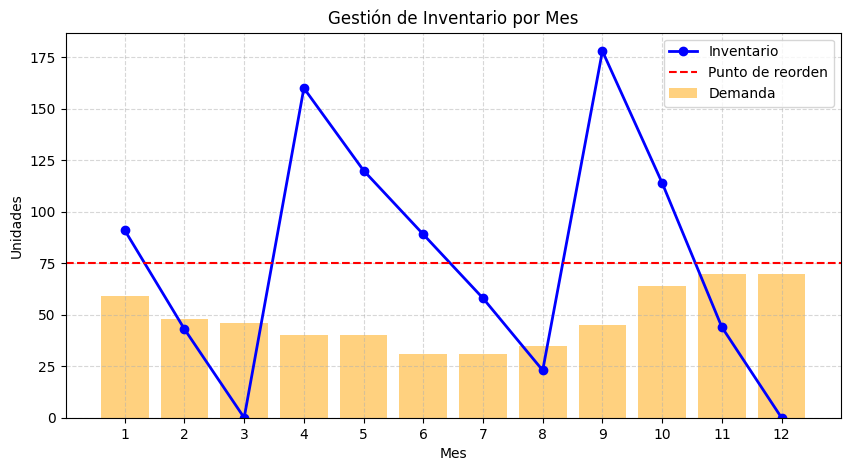

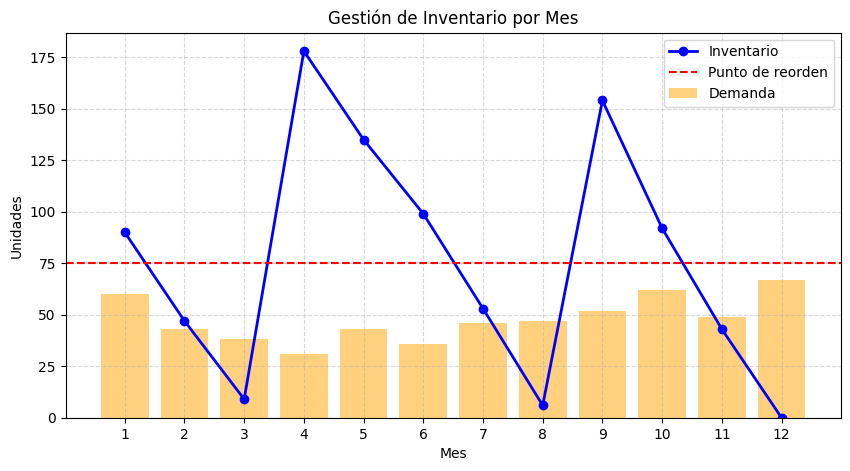

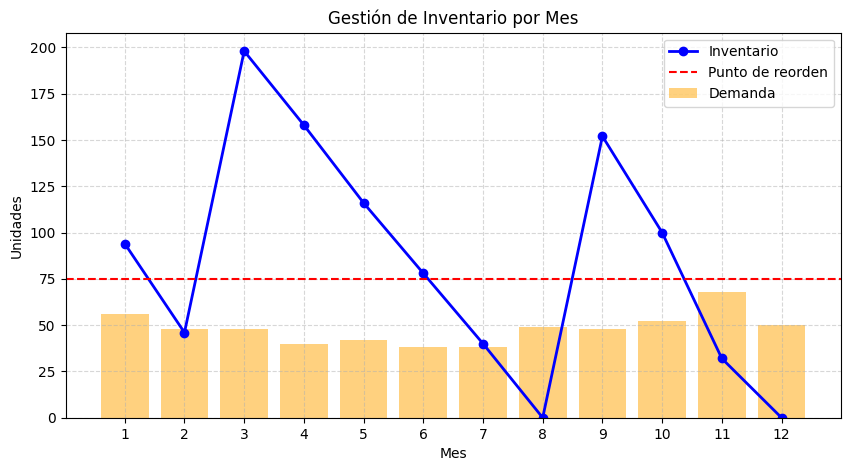

q=200, R=75: $3211.11


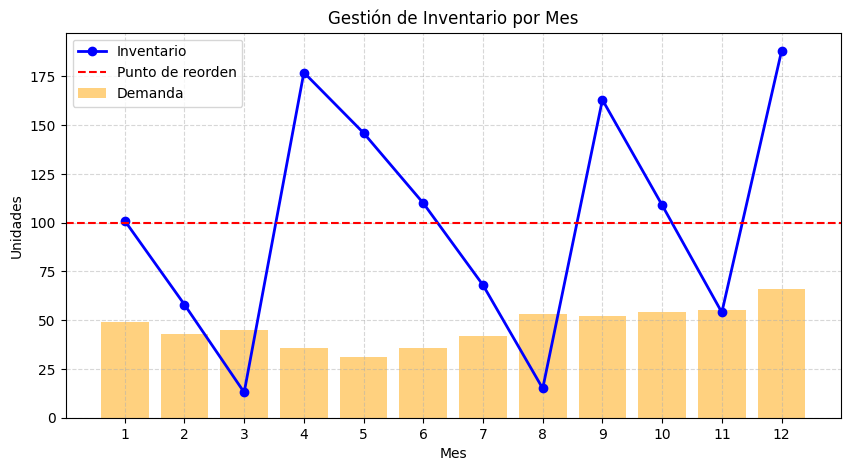

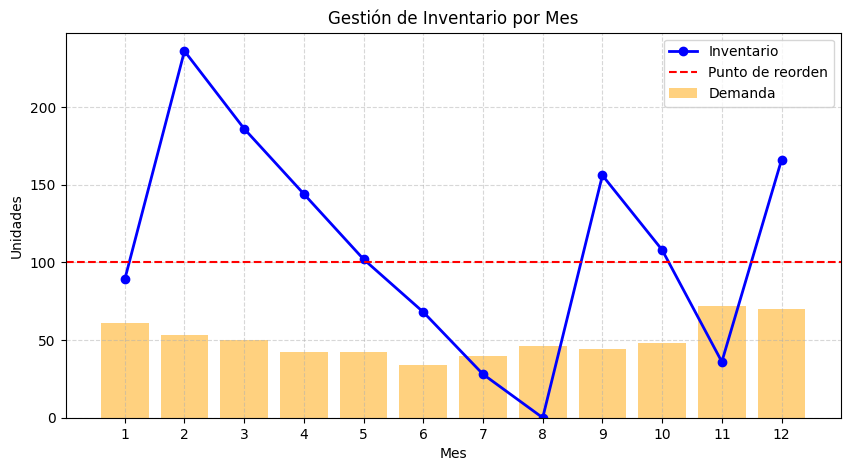

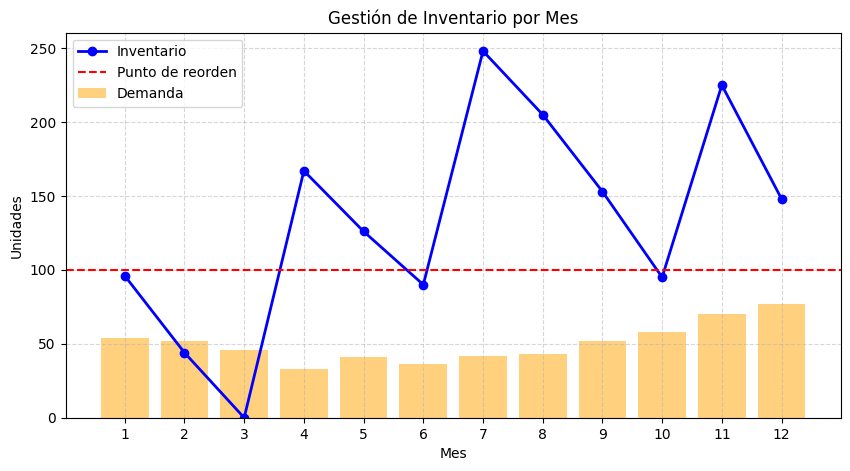

q=200, R=100: $2921.11


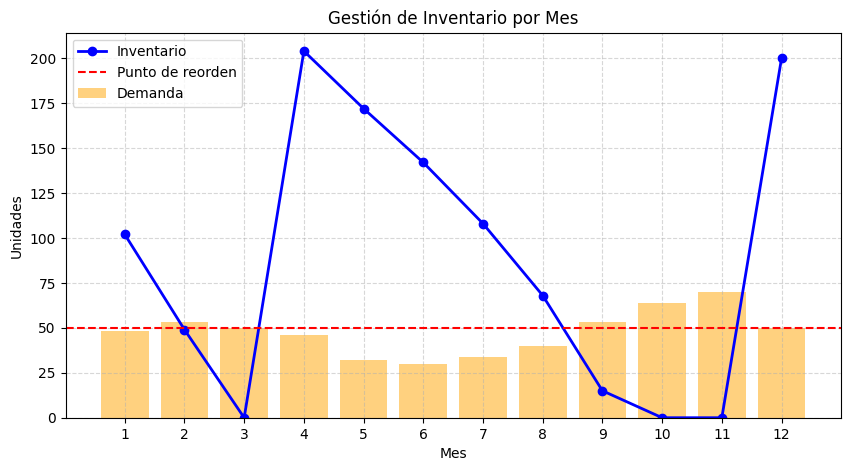

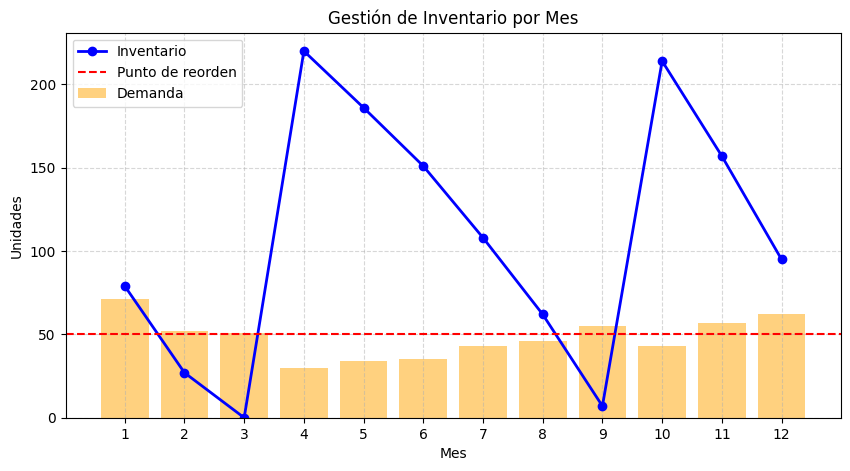

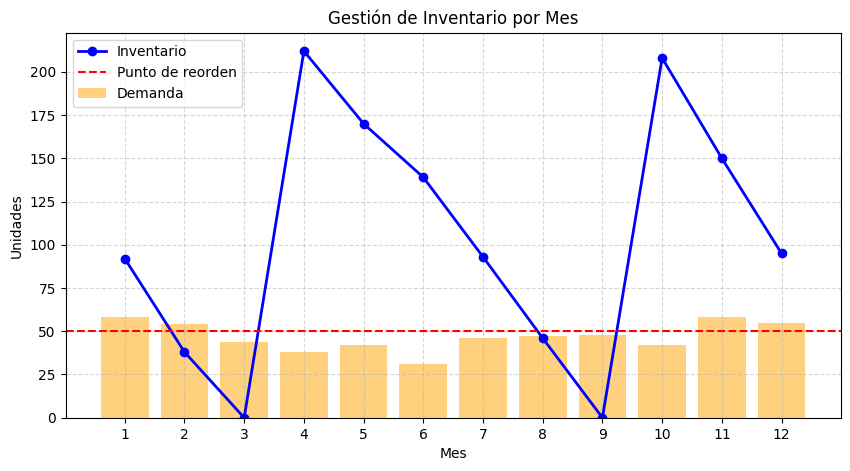

q=250, R=50: $4738.33


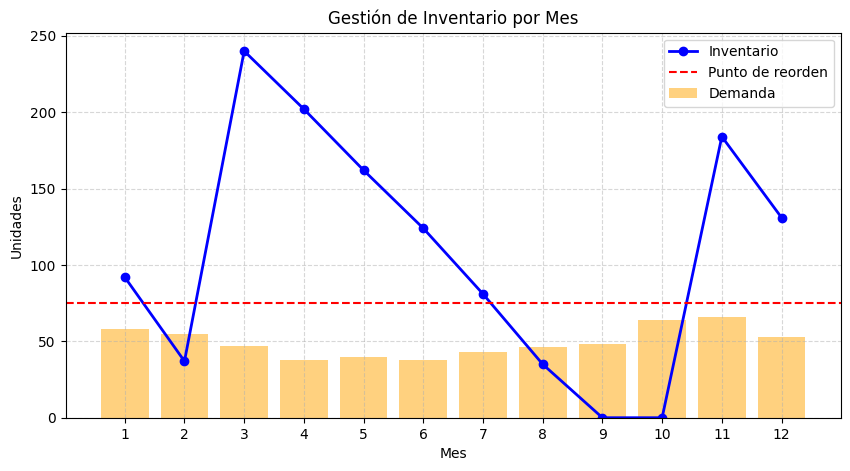

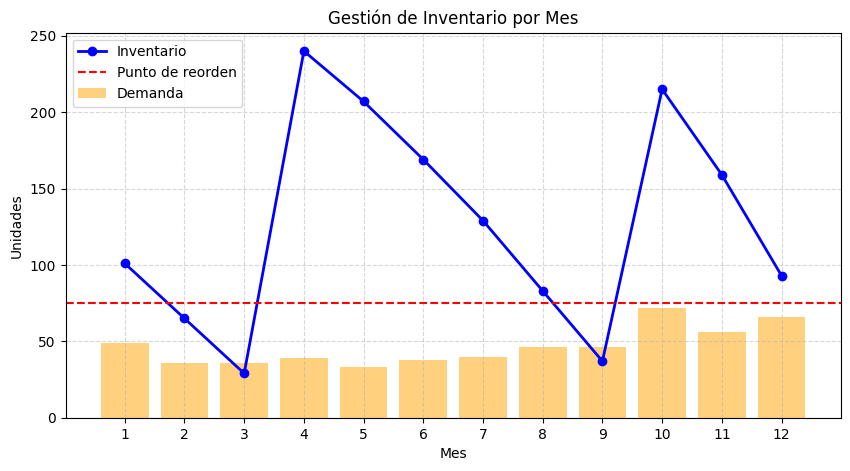

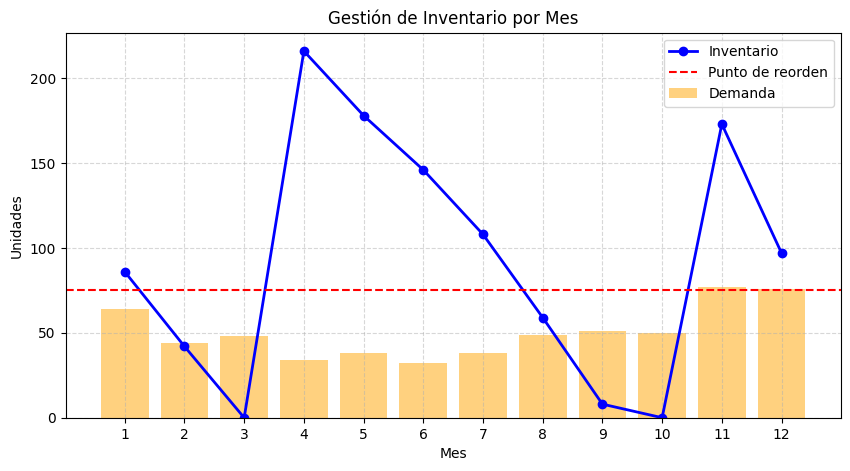

q=250, R=75: $4465.56


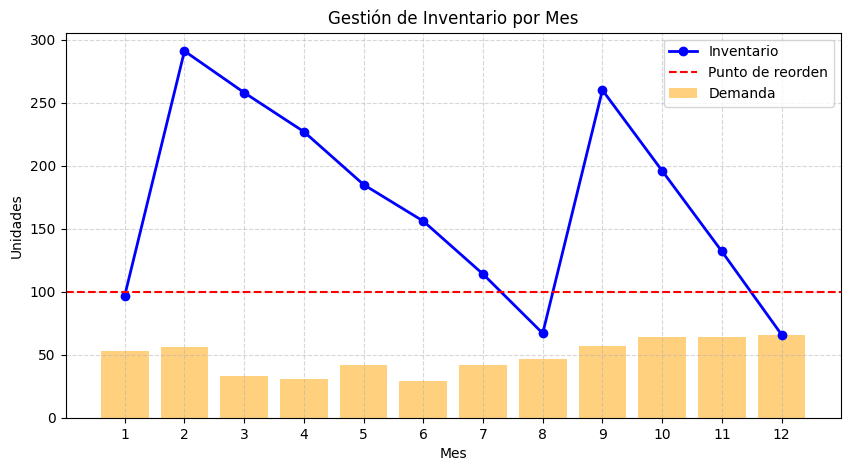

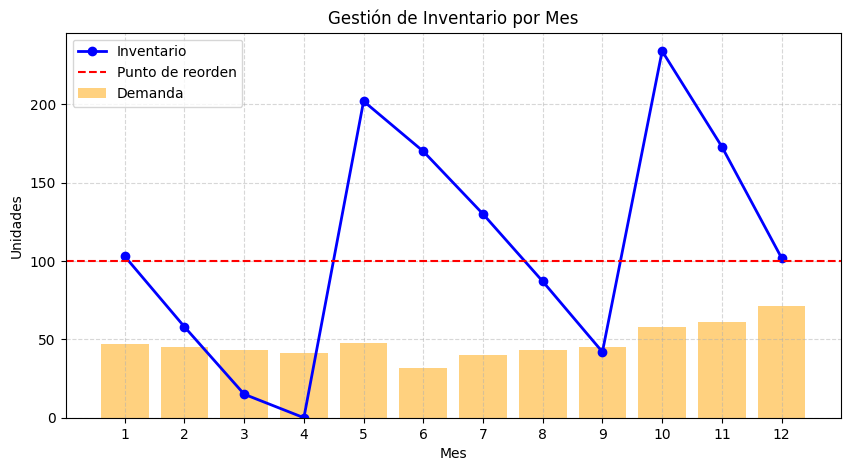

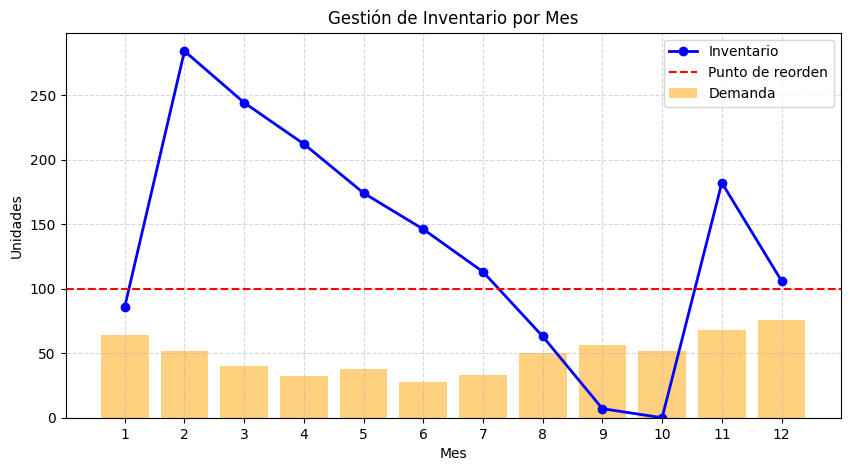

q=250, R=100: $4184.44

Mejor configuración encontrada:
Cantidad a pedir (q): 150
Punto de reorden (R): 100
Costo anual estimado: $2649.44

Simulación con los mejores parámetros:


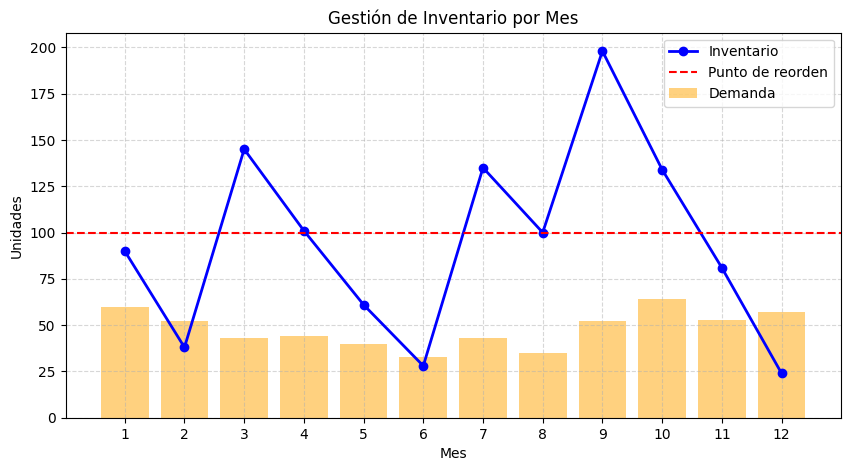

2291.6666666666665

In [4]:
import random
import matplotlib.pyplot as plt

def obtener_demanda(num):
    rangos = [
        (0.000, 0.010, 35), (0.010, 0.025, 36), (0.025, 0.045, 37),
        (0.045, 0.065, 38), (0.065, 0.087, 39), (0.087, 0.110, 40),
        (0.110, 0.135, 41), (0.135, 0.162, 42), (0.162, 0.190, 43),
        (0.190, 0.219, 44), (0.219, 0.254, 45), (0.254, 0.299, 46),
        (0.299, 0.359, 47), (0.359, 0.424, 48), (0.424, 0.494, 49),
        (0.494, 0.574, 50), (0.574, 0.649, 51), (0.649, 0.719, 52),
        (0.719, 0.784, 53), (0.784, 0.844, 54), (0.844, 0.894, 55),
        (0.894, 0.934, 56), (0.934, 0.964, 57), (0.964, 0.980, 58),
        (0.980, 0.995, 59), (0.995, 1.000, 60)
    ]
    for inicio, fin, valor in rangos:
        if inicio <= num < fin:
            return valor
    return 60

def tiempo_entrega(num):
    if num < 0.3: return 1
    if num < 0.7: return 2
    return 3

factores_mes = [1.2, 1.0, 0.9, 0.8, 0.8, 0.7, 0.8, 0.9, 1.0, 1.2, 1.3, 1.4]

#Costos
costo_pedido = 100
costo_almacen = 20/12
costo_faltante = 50

def mostrar_grafico_inventario(meses, inventario, demanda, punto_reorden):
    #Creamos un gráfico combinado
    plt.figure(figsize=(10, 5))

    #Gráfico de línea para el inventario
    plt.plot(meses, inventario, 'b-', linewidth=2, marker='o', label='Inventario')

    #Gráfico de barras para la demanda
    plt.bar(meses, demanda, color='orange', alpha=0.5, label='Demanda')

    #Línea para el punto de reorden
    plt.axhline(punto_reorden, color='red', linestyle='--', label='Punto de reorden')

    plt.title('Gestión de Inventario por Mes')
    plt.xlabel('Mes')
    plt.ylabel('Unidades')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.xticks(meses)
    plt.show()

def simular_inventario(q, r, inventario_inicio=150, meses=12):
    inventario = inventario_inicio
    pedidos = []
    costos = 0
    costo_alm = 0
    costo_falt = 0

    # Datos para el gráfico
    m = [] # Meses
    inv = []  # Inventario
    dem = []  # Demanda

    for mes in range(1, meses+1):
        #Recibir pedidos
        for p in pedidos[:]:
            if p[1] == mes:
                inventario += p[0]
                pedidos.remove(p)

        #Calcular demanda
        demanda = round(obtener_demanda(random.random()) * factores_mes[mes-1])
        dem.append(demanda)

        #Actualizar inventario
        if inventario >= demanda:
            inventario -= demanda
        else:
            faltantes = demanda - inventario
            costo_falt += faltantes * costo_faltante
            inventario = 0

        #Costos
        costo_alm += inventario * costo_almacen

        #Hacer pedido
        if inventario <= r and not pedidos:
            t = tiempo_entrega(random.random())
            pedidos.append((q, mes + t))
            costos += costo_pedido

        #Guardar datos
        m.append(mes)
        inv.append(inventario)

    #Mostrar gráfico al final de la simulación
    mostrar_grafico_inventario(m, inv, dem, r)

    return costos + costo_alm + costo_falt

#Programa principal
print("Simulación de Sistema de Inventario\n")

#Simulación inicial
print("Primera simulación con valores iniciales:")
costo_inicial = simular_inventario(200, 100)
print(f"Costo total estimado: ${costo_inicial:.2f}\n")

#Búsqueda de mejores parámetros
print("Buscando mejores parámetros")
mejor_q = mejor_r = None
menor_costo = float('inf')

valores_q = [150, 200, 250]
valores_r = [50, 75, 100]

for q in valores_q:
    for r in valores_r:
        costo_promedio = sum(simular_inventario(q, r) for _ in range(3)) / 3
        print(f"q={q}, R={r}: ${costo_promedio:.2f}")

        if costo_promedio < menor_costo:
            mejor_q, mejor_r, menor_costo = q, r, costo_promedio

#Resultados finales
print("\nMejor configuración encontrada:")
print(f"Cantidad a pedir (q): {mejor_q}")
print(f"Punto de reorden (R): {mejor_r}")
print(f"Costo anual estimado: ${menor_costo:.2f}\n")

#Simulación final con mejores parámetros
print("Simulación con los mejores parámetros:")
simular_inventario(mejor_q, mejor_r)